# Data examination

In a first step we present a concise overview table over the correlation lenght data.

In [1]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results.csv", header = TRUE, sep = ",")
second_moment <- read.csv("..\\data\\results_second_moment.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\results_fit.csv", header = TRUE, sep = ",")


# Removing unnecessary data
d <- second_moment[, !(names(second_moment) %in% c("m12", "m23", "m13", "m34", "m24", "m14"))]

# Rounding correlation lenghts
d$corr12 <- round(d$corr12, digits = 2)
d$corr23 <- round(d$corr23, digits = 2)
d$corr34 <- round(d$corr34, digits = 2)
d$corr13 <- round(d$corr13, digits = 2)
d$corr24 <- round(d$corr24, digits = 2)
d$corr14 <- round(d$corr14, digits = 2)
d$corr_fit <- round(fit$corr, digits = 2)

# Eventually removing correlation lenghts with momentum mode 4
#d <- d[, !(names(d) %in% c("corr34", "corr24", "corr14"))]

# Adding additional info
temps <- c()
max_ts <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts

# Reordering columns
overview <- d[, c("index", "max_t", "temp", "corr12", "corr23", "corr13", "corr_fit", "corr34", "corr24", "corr14")]

# Looking at the interesting data
#overview[overview$temp >= 0.1 & overview$temp < 0.7, ]
overview[overview$max_t == 16, ]
overview[overview$max_t == 24, ]
overview[overview$max_t == 36, ]
overview[overview$max_t == 54, ]

Warning message in file(file, "rt"):
"kann Datei '..\data\results_second_moment.csv' nicht öffnen: No such file or directory"


ERROR: Error in file(file, "rt"): kann Verbindung nicht öffnen


## Compounded data examination

In [2]:
# Presenting the correlation lenght data in a simple table
results <- read.csv("..\\data\\results_comp.csv", header = TRUE, sep = ",")
second_moment <- read.csv("..\\data\\results_comp_second_moment.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\results_comp_fit.csv", header = TRUE, sep = ",")


# Removing unnecessary data
d <- second_moment[, !(names(second_moment) %in% c("m12", "m23", "m13", "m34", "m24", "m14"))]

# Eventually removing correlation lenghts with momentum mode 4
#d <- d[, !(names(d) %in% c("corr34", "corr24", "corr14"))]

# Rounding correlation lenghts
d$corr12 <- round(d$corr12, digits = 2)
d$corr23 <- round(d$corr23, digits = 2)
d$corr34 <- round(d$corr34, digits = 2)
d$corr13 <- round(d$corr13, digits = 2)
d$corr24 <- round(d$corr24, digits = 2)
d$corr14 <- round(d$corr14, digits = 2)
d$corr12_err <- round(d$corr12_err, digits = 4)
d$corr23_err <- round(d$corr23_err, digits = 4)
d$corr34_err <- round(d$corr34_err, digits = 4)
d$corr13_err <- round(d$corr13_err, digits = 4)
d$corr24_err <- round(d$corr24_err, digits = 4)
d$corr14_err <- round(d$corr14_err, digits = 4)
d$corr_fit <- round(fit$corr, digits = 2)

# Adding additional info
temps <- c()
max_ts <- c()
comptype <- c()
average_corr12 <- c()
average_corr12_err <- c()
for (index in d$index) {
	temps <- append(temps, results$temp[results$index == index])
	max_ts <- append(max_ts, results$t[results$index == index])
	comptype <- append(comptype, results$comptype[results$index == index])
	average_corr12 <- append(average_corr12, results$corr12[results$index == index])
	average_corr12_err <- append(average_corr12_err, results$corr12_err[results$index == index])
}
d$temp <- temps
d$max_t <- max_ts
d$comptype <- comptype
d$averaged <- round(average_corr12, digits = 2)
d$averaged_err <- round(average_corr12_err, digits = 2)

# Reordering columns
comp_overview <- d[, c("index", "max_t", "temp", "comptype",
	"averaged", "averaged_err", "corr_fit",
	"corr12", "corr12_err",
	"corr13", "corr13_err")]

# Looking at the interesting data
comp_overview <- comp_overview[order(comp_overview$temp), ]
comp_overview <- comp_overview[comp_overview$index != 4105, ]
comp_overview[comp_overview$max_t == 16 & comp_overview$temp >= 0.23 & comp_overview$temp <= 0.40, ]
comp_overview[comp_overview$max_t == 24 & comp_overview$temp >= 0.23 & comp_overview$temp <= 0.40, ]
comp_overview[comp_overview$max_t == 36 & comp_overview$temp >= 0.23 & comp_overview$temp <= 0.40, ]
comp_overview[comp_overview$max_t == 54 & comp_overview$temp >= 0.23 & comp_overview$temp <= 0.40, ]

comp_overview$corr12_err

Warning message in file(file, "rt"):
"kann Datei '..\data\results_comp.csv' nicht öffnen: No such file or directory"


ERROR: Error in file(file, "rt"): kann Verbindung nicht öffnen


## Compounded correlation lengths

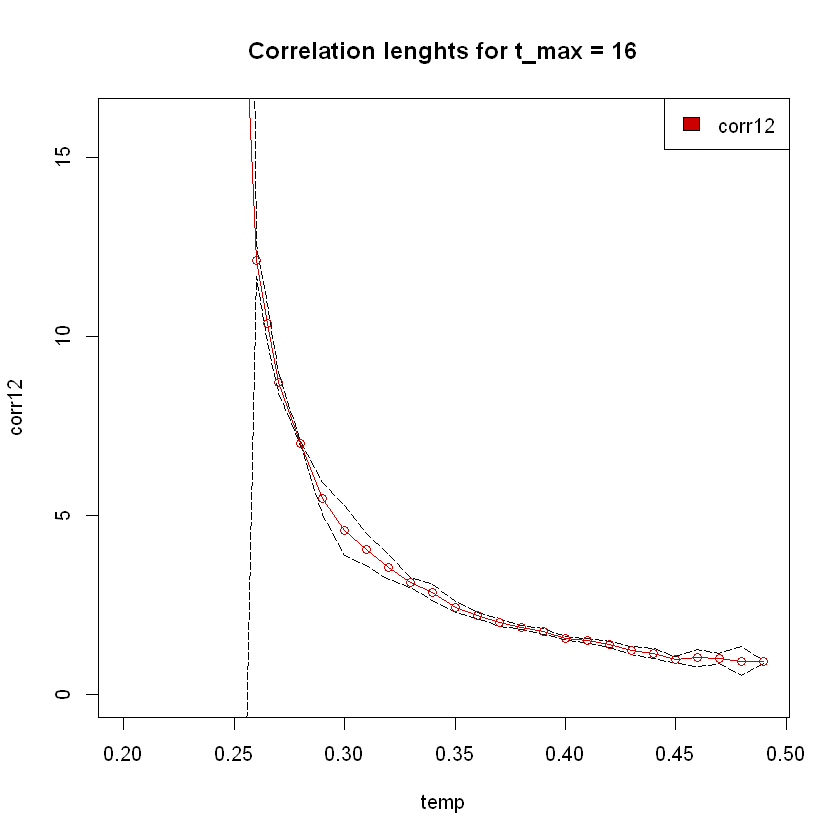

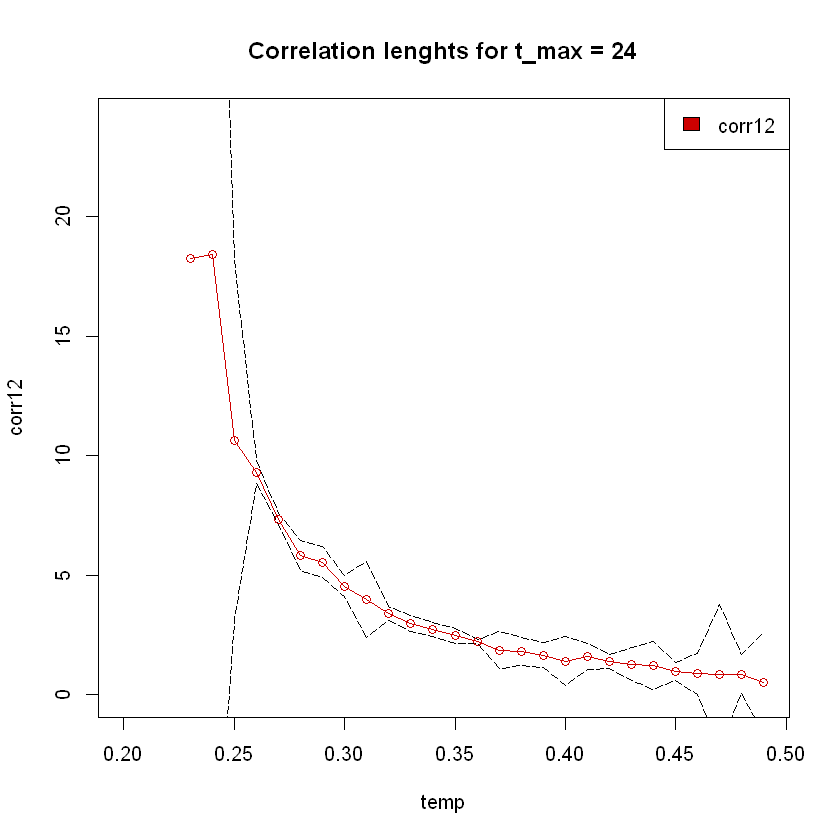

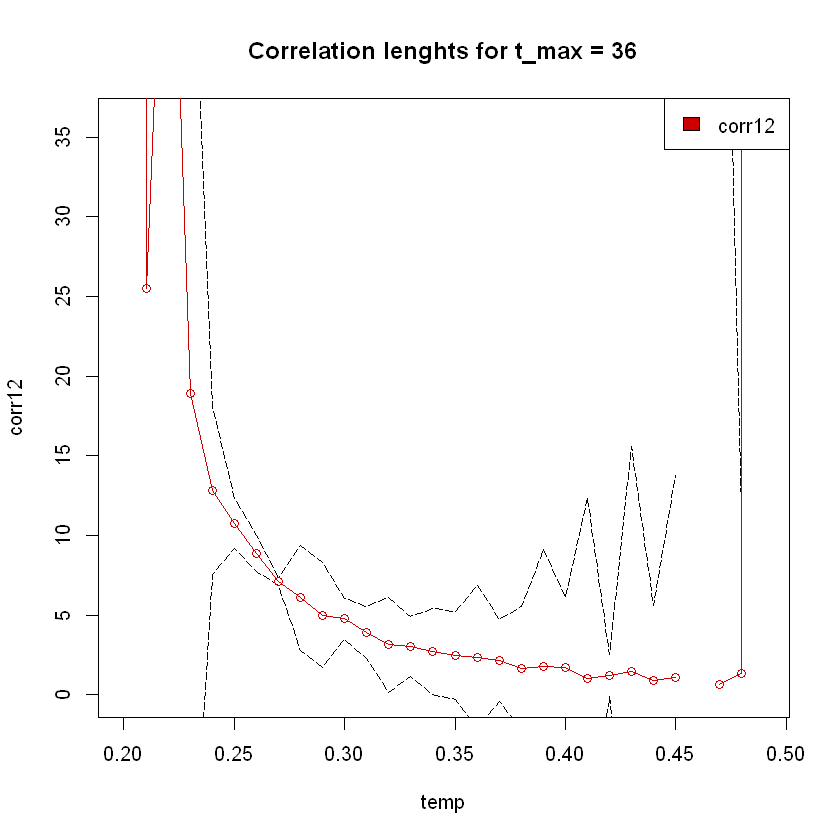

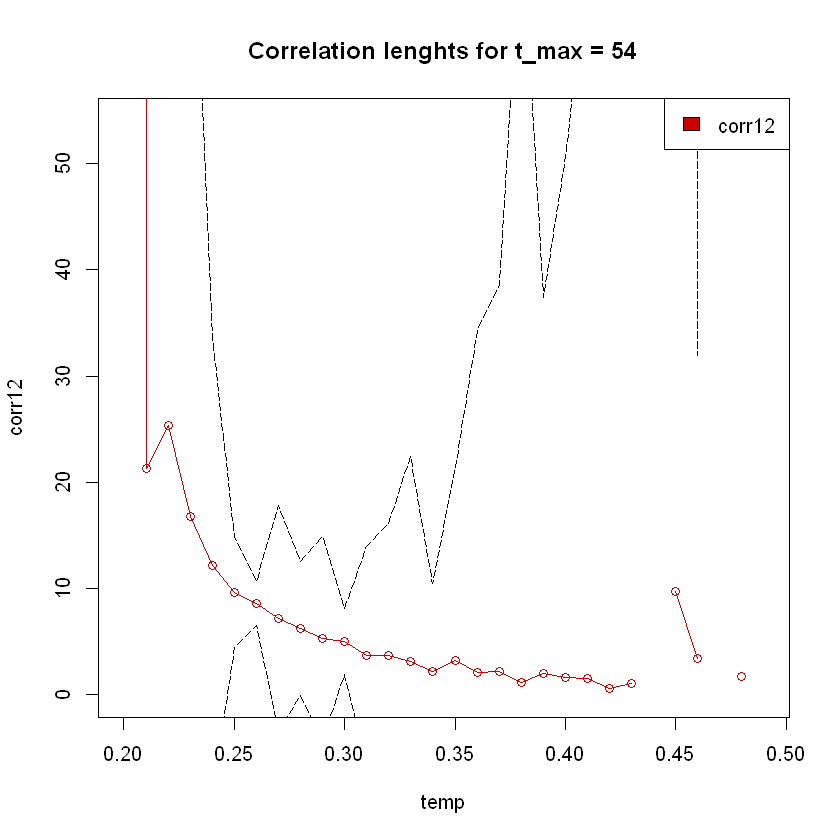

In [ ]:
for (size in c(16, 24, 36, 54)) {
	d <- comp_overview[comp_overview$max_t == size, c("max_t", "temp", "corr12", "corr12_err")]
	plot(corr12 ~ temp, data = d, ylim = c(0, size), col = "red3", type = "o")
	upper <- d$corr12 + d$corr12_err
	lower <- d$corr12 - d$corr12_err
	lines(d$temp, upper, lty = 5)
	lines(d$temp, lower, lty = 5)
	points(corr12 ~ temp, data = d, col = "red3")
	lines(corr12 ~ temp, data = d, col = "red3")
	title(paste("Correlation lenghts for t_max =", size))
	legend <- list(names = c("corr12"), cols = "red3")
	legend("topright", y = legend$names, fill = legend$cols)
}

## Step-scaling functions

Here we plot the step-scaling functions $\xi (1.5 L) / \xi (L) \sim \xi(L) / L$. In a first step, we only utilize the correlation lenghts `corr12`, that only considers the first and second non-zero momentum modes.

,index,max_t,temp,corr12,corr12_err,corr_beta_ratio,corr_beta_ratio_err,corr12_15,corr12_15_err,corr_step_ratio,corr_step_ratio_err
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,6,16,0.26,12.11,0.4336,0.756875,0.02710000,9.31,0.4746,0.7687861,0.06671723
8,7,16,0.27,8.70,0.2808,0.543750,0.01755000,7.35,0.2213,0.8448276,0.05270432
9,8,16,0.28,7.00,0.0522,0.437500,0.00326250,5.82,0.6160,0.8314286,0.09420008
10,9,16,0.29,5.47,0.4444,0.341875,0.02777500,5.55,0.6462,1.0146252,0.20056663
11,10,16,0.30,4.58,0.7002,0.286250,0.04376250,4.54,0.4366,0.9912664,0.24687439
12,11,16,0.31,4.05,0.4481,0.253125,0.02800625,3.99,1.5985,0.9851852,0.50369419
13,12,16,0.32,3.56,0.3562,0.222500,0.02226250,3.41,0.2942,0.9578652,0.17848078
14,13,16,0.33,3.13,0.1469,0.195625,0.00918125,2.98,0.3180,0.9520767,0.14628117
15,14,16,0.34,2.84,0.2225,0.177500,0.01390625,2.74,0.2847,0.9647887,0.17583292


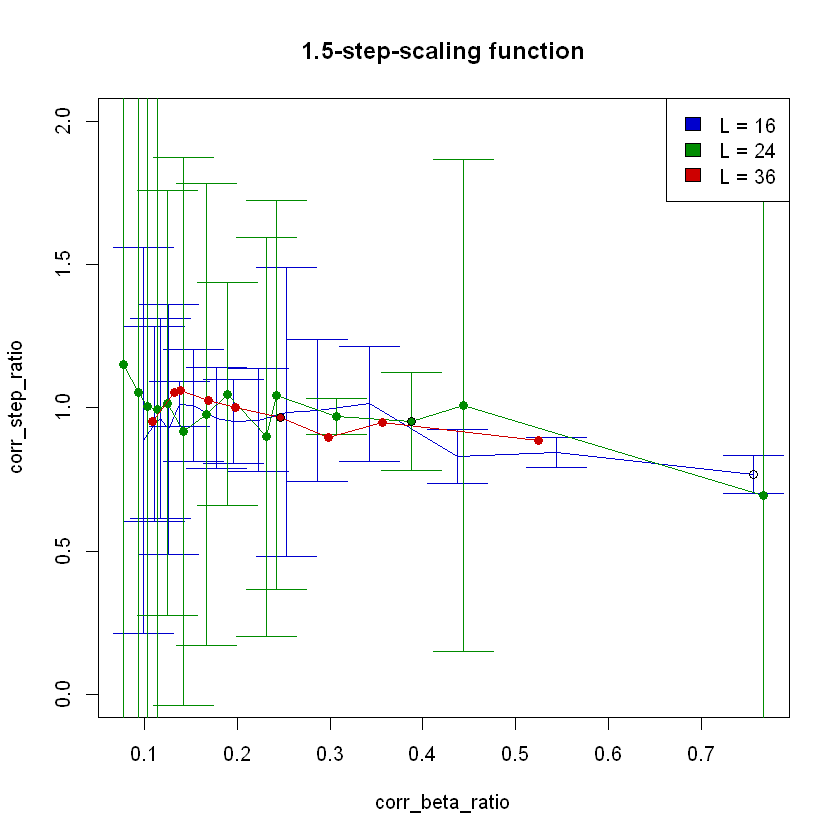

In [ ]:
# Loading data
d <- comp_overview[, c("index", "max_t", "temp", "corr12", "corr12_err")]

# Building the x and y axis data
d$corr_beta_ratio <- d$corr12 / d$max_t
d$corr_beta_ratio_err <- d$corr12_err / d$max_t
d$corr12_15 <- 0
d$corr12_15_err <- 0
for (i in 1:nrow(d)) {
	my_temp <- d$temp[i]
	next_size <- d$max_t[i] * 3 / 2
	d$corr12_15[i] <- ifelse(next_size %in% d$max_t,
		ifelse(my_temp %in% d$temp[d$max_t == next_size],
		d$corr12[d$temp == my_temp & d$max_t == next_size][1], 0), 0)
	d$corr12_15_err[i] <- ifelse(next_size %in% d$max_t,
		ifelse(my_temp %in% d$temp[d$max_t == next_size],
		d$corr12_err[d$temp == my_temp & d$max_t == next_size][1], 0), 0)
}
d <- d[d$corr12_15 != 0, ]
d$corr_step_ratio <- d$corr12_15 / d$corr12
d$corr_step_ratio_err <- d$corr12_err * abs(d$corr12_15 / (d$corr12 * d$corr12) )
d$corr_step_ratio_err <- d$corr_step_ratio_err + d$corr12_15_err / abs(d$corr12)

#d <- d[d$corr12 <= d$max_t, ]

d16 <- d[d$max_t == 16, ]
d24 <- d[d$max_t == 24, ]
d36 <- d[d$max_t == 36, ]

d16 <- d16[d16$temp >= 0.26 & d16$temp <= 0.40, ]
d24 <- d24[d24$temp >= 0.24 & d24$temp <= 0.37, ]
d36 <- d36[d36$temp >= 0.23 & d36$temp <= 0.31, ]

d16
#d24
#d36

dat <- rbind(d16, d24, d36)

plot(
	corr_step_ratio ~ corr_beta_ratio,
	data = d16,
	col = "blue3",
	type = "l",
	pch = 19,
	xlim = c(min(dat$corr_beta_ratio), max(dat$corr_beta_ratio)),
	#ylim = c(min(dat$corr_step_ratio), max(dat$corr_step_ratio))
	ylim = c(0, 2)
)
if(TRUE) arrows(d16$corr_beta_ratio,
	d16$corr_step_ratio + d16$corr_step_ratio_err,
	d16$corr_beta_ratio,
	d16$corr_step_ratio - d16$corr_step_ratio_err,
	code = 3, angle = 90, col = "blue3"
)
if(FALSE) arrows(d16$corr_beta_ratio + d16$corr_beta_ratio_err,
	d16$corr_step_ratio,
	d16$corr_beta_ratio - d16$corr_beta_ratio_err,
	d16$corr_step_ratio,
	code = 3, angle = 90, col = "blue3"
)
if(TRUE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 19)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d24, col = "green4", pch = 19)
	if(TRUE) arrows(d24$corr_beta_ratio,
	d24$corr_step_ratio + d24$corr_step_ratio_err,
	d24$corr_beta_ratio,
	d24$corr_step_ratio - d24$corr_step_ratio_err,
	code = 3, angle = 90, col = "green4"
)
}
if(TRUE) {
	points(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 19)
	lines(corr_step_ratio ~ corr_beta_ratio, data = d36, col = "red3", pch = 19)
	if(FALSE) arrows(d36$corr_beta_ratio,
	d36$corr_step_ratio + d36$corr_step_ratio_err,
	d36$corr_beta_ratio,
	d36$corr_step_ratio - d36$corr_step_ratio_err,
	code = 3, angle = 90, col = "red3"
)
}
title("1.5-step-scaling function")
legend("topright", y = c("L = 16", "L = 24", "L = 36"), fill = c("blue3", "green4", "red3"))
points(d$corr_beta_ratio[d$temp == 0.26], d$corr_step_ratio[d$temp == 0.26])

## Compounded correlation functions

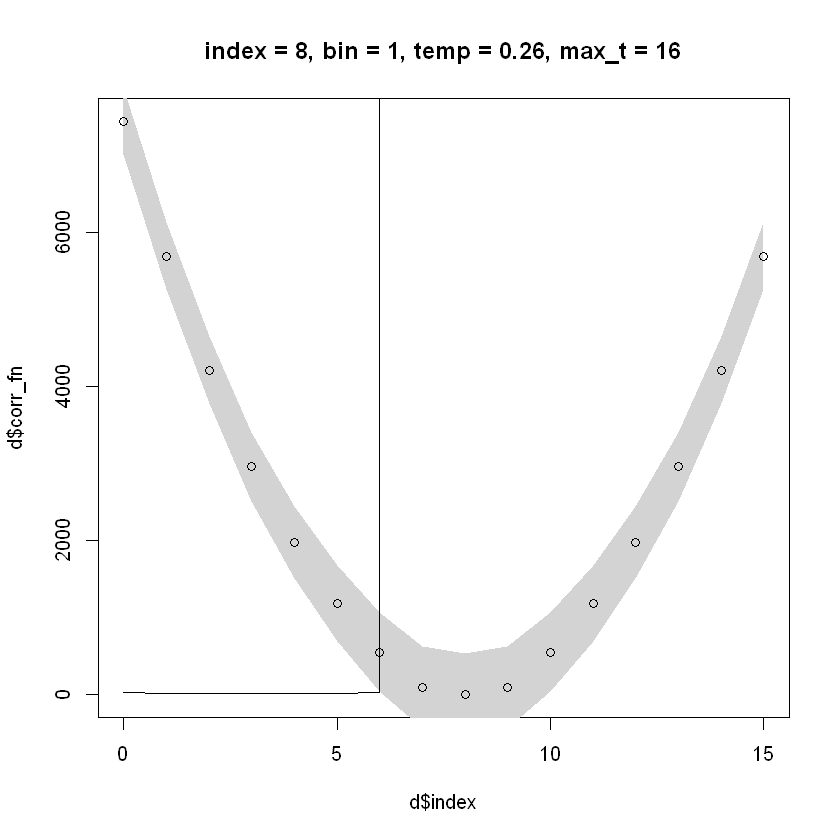

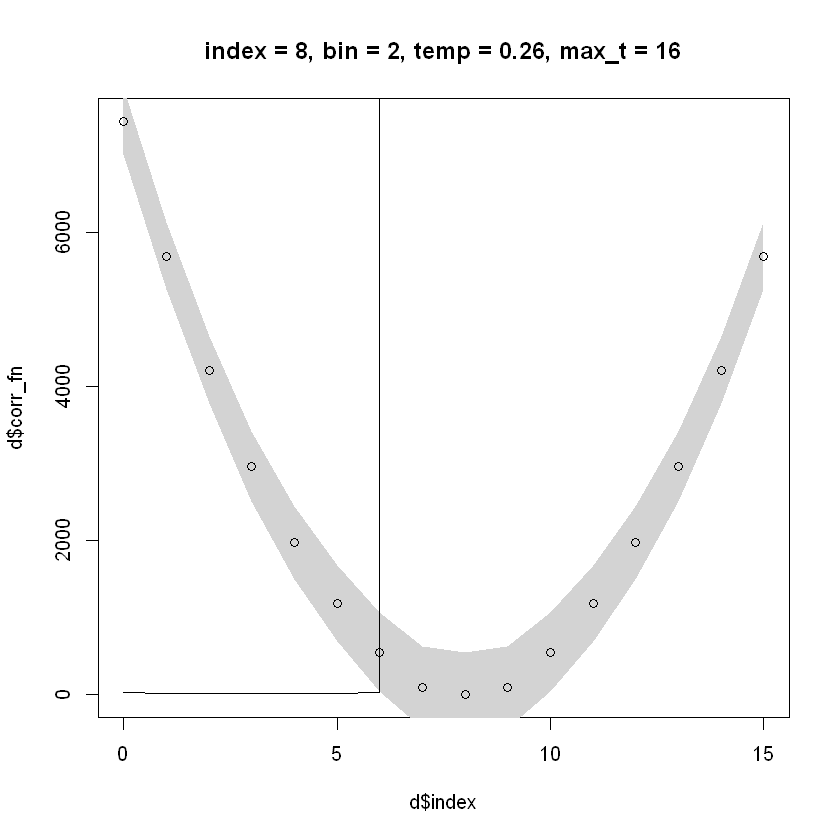

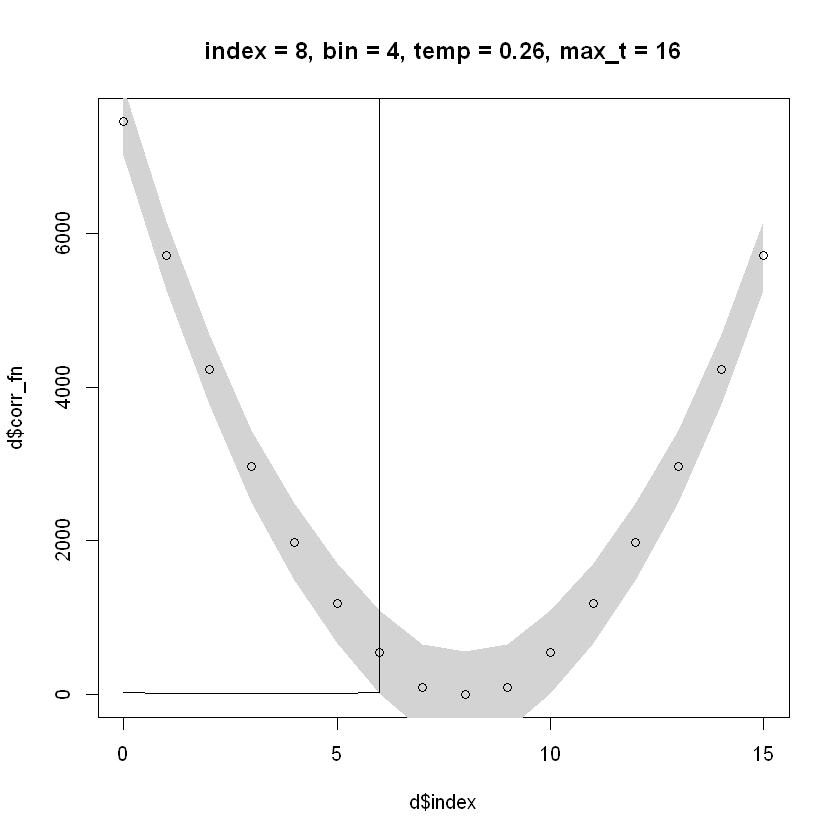

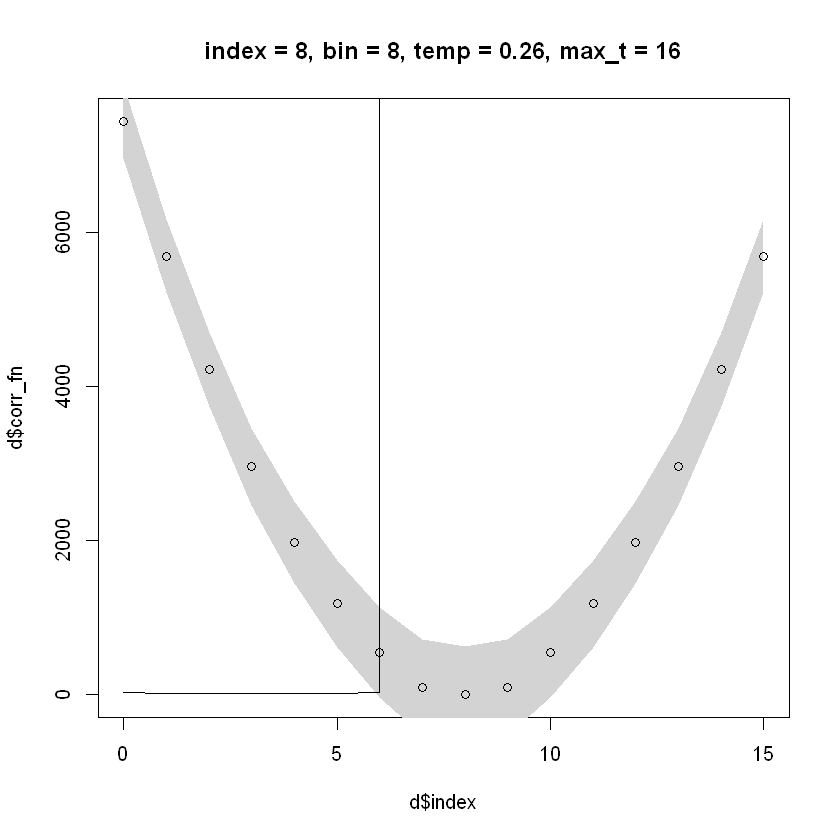

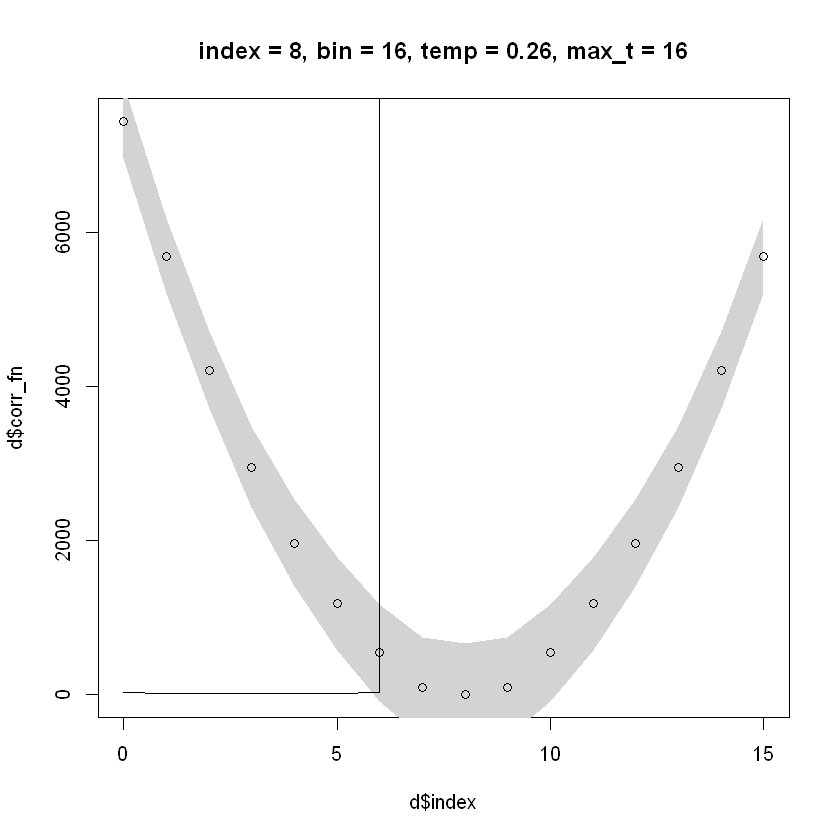

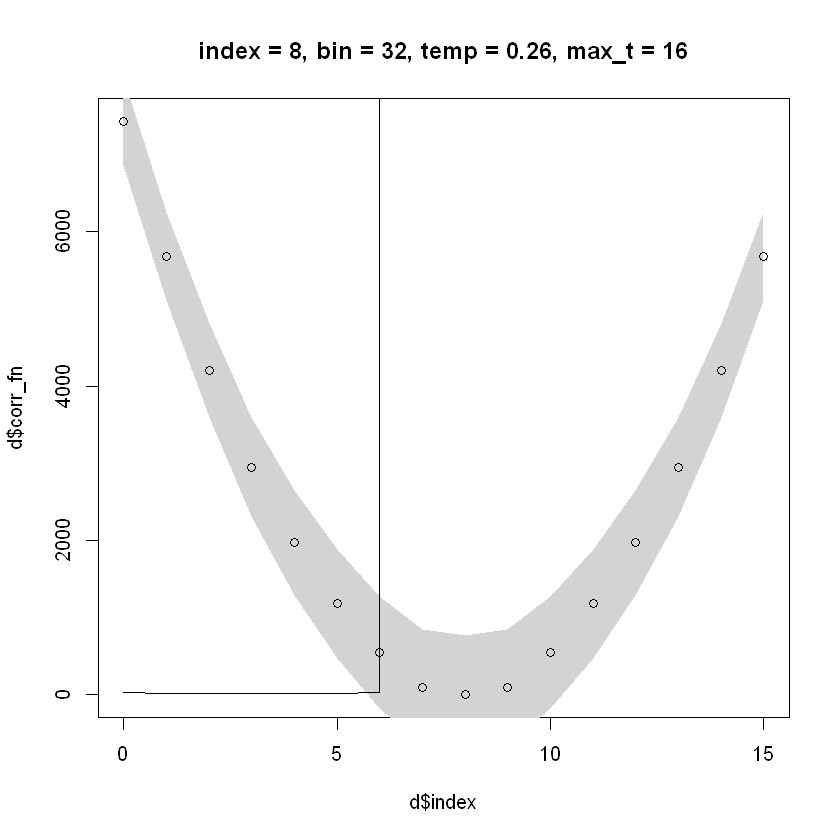

In [2]:
results <- read.csv("..\\data\\results.csv", header = TRUE, sep = ",")
fit <- read.csv("..\\data\\corr_fn_fits.csv", header = TRUE, sep = ",")

#indices <- c(8)
#for (index in indices) {
index <- 8

	correlation_res <- read.csv(paste("..\\data\\correlation_data\\correlation_", index, "_res.csv", sep = ""), header = FALSE)
	correlation_err <- read.csv(paste("..\\data\\correlation_data\\correlation_", index, "_err.csv", sep = ""), header = FALSE)

	for (bin_size in c(1, 2, 4, 8, 16, 32)) {

	d <- data.frame(unname(unlist(correlation_res[correlation_res$V1 == bin_size, -1])))
	colnames(d) <- c("corr_fn")
	d$corr_fn_err <- unname(unlist(correlation_err[correlation_err$V1 == bin_size, -1]))
	d$index <- 1:nrow(d) - 1
	d$corr_fn <- d$corr_fn[d$index == (nrow(d) / 2)] - d$corr_fn

	d$sym_corr_fn <- d$corr_fn
	for (i in 1:(nrow(d) - 1)) {
		d$sym_corr_fn[d$index == i] <- (d$corr_fn[d$index == i] + d$corr_fn[d$index == (nrow(d) - i)]) / 2
	}
	d$corr_fn <- d$sym_corr_fn

	params <- fit[fit$index == index, ]
	d$fit <- params$a * cosh(params$m * (d$index - params$n / 2)) + params$b
	plot(d$index, d$corr_fn)
	title(paste("index = ", index, ", bin = ", bin_size,
		", temp = ", round(results$temp[results$index == index],  digits = 3),
		", max_t = ", results$t[results$index == index],
		#", corr12 = ", results$corr12[results$index == index],
		#", corr12_err = ", results$corr12_err[results$index == index],
		sep = ""))

	d$upper <- d$corr_fn + d$corr_fn_err
	d$lower <- d$corr_fn - d$corr_fn_err
	y_shade <- c()
	for (entry in d$upper) {
		y_shade <- append(y_shade, entry)
	}
	for (entry in rev(d$lower)) {
		y_shade <- append(y_shade, entry)
	}
	x_shade <- c(d$index, rev(d$index))
	polygon(x_shade, y_shade, col = "lightgray", lty = 0)
	points(d$index, d$corr_fn)
	lines(d$index, d$fit)
	}
#}